In [1]:
# import dependencies
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import config
import json
import pandas as pd

In [2]:
# initalize analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_token_secret = config.access_token_secret

In [4]:
# set twitter handles (Used the UK bbc twitter to get a comparison between UK and US news. Might be intresting)
twitter_handles = ['@cnn', '@foxnews', '@bbcnews', '@cbsnews', '@nytimes']

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
# tweet lists
cnn_tweets = []
fox_tweets = []
bbc_tweets = []
cbs_tweets = []
nyt_tweets = []

# tweet date list
cnn_tweet_date = []
fox_tweet_date = []
bbc_tweet_date = []
cbs_tweet_date = []
nyt_tweet_date = []

# comp lists
cnn_comp = []
fox_comp = []
bbc_comp = []
cbs_comp = []
nyt_comp = []

# pos lists
cnn_pos = []
fox_pos = []
bbc_pos = []
cbs_pos = []
nyt_pos = []

# neu lists
cnn_neu = []
fox_neu = []
bbc_neu = []
cbs_neu = []
nyt_neu = []

# neg lists
cnn_neg = []
fox_neg = []
bbc_neg = []
cbs_neg = []
nyt_neg = []

In [7]:
# grab tweets for each handle
for handle in twitter_handles:
    # TODO: change items to 100
    for tweet in tweepy.Cursor(api.user_timeline, id = handle, tweet_mode = 'extended').items(100):
        tweet_text = json.dumps(tweet._json, indent=3)
        tweet = json.loads(tweet_text)
        
        # grab full tweet
        full_tweet = tweet['full_text']
        
        # remove tweet url
        split_tweet = full_tweet.split('https',1)[0]
        
        # place in correct list
        if(handle == '@cnn'):
            # add tweet to list
            cnn_tweets.append(split_tweet)
            cnn_tweet_date.append(tweet['created_at'])
            # get sentiments
            comp_sentiment = analyzer.polarity_scores(split_tweet)['compound']
            pos_sentiment = analyzer.polarity_scores(split_tweet)["pos"]
            neu_sentiment = analyzer.polarity_scores(split_tweet)["neu"]
            neg_sentiment = analyzer.polarity_scores(split_tweet)["neg"]
            
            # add sentiments to lists
            cnn_comp.append(comp_sentiment)
            cnn_pos.append(pos_sentiment) 
            cnn_neu.append(neu_sentiment)
            cnn_neg.append(neg_sentiment)
        elif(handle == '@foxnews'):
            # add tweet to list
            fox_tweets.append(split_tweet)
            fox_tweet_date.append(tweet['created_at'])

            
            # get sentiments
            comp_sentiment = analyzer.polarity_scores(split_tweet)['compound']
            pos_sentiment = analyzer.polarity_scores(split_tweet)["pos"]
            neu_sentiment = analyzer.polarity_scores(split_tweet)["neu"]
            neg_sentiment = analyzer.polarity_scores(split_tweet)["neg"]
            
            # add sentiments to lists
            fox_comp.append(comp_sentiment)
            fox_pos.append(pos_sentiment) 
            fox_neu.append(neu_sentiment)
            fox_neg.append(neg_sentiment)
        elif(handle == '@bbcnews'):
            # add tweet to list
            bbc_tweets.append(split_tweet)
            bbc_tweet_date.append(tweet['created_at'])
            
            # get sentiments
            comp_sentiment = analyzer.polarity_scores(split_tweet)['compound']
            pos_sentiment = analyzer.polarity_scores(split_tweet)["pos"]
            neu_sentiment = analyzer.polarity_scores(split_tweet)["neu"]
            neg_sentiment = analyzer.polarity_scores(split_tweet)["neg"]
            
            # add sentiments to lists
            bbc_comp.append(comp_sentiment)
            bbc_pos.append(pos_sentiment) 
            bbc_neu.append(neu_sentiment)
            bbc_neg.append(neg_sentiment)
        elif(handle == '@cbsnews'):
            # add tweet to list
            cbs_tweets.append(split_tweet)
            cbs_tweet_date.append(tweet['created_at'])
            
            # get sentiments
            comp_sentiment = analyzer.polarity_scores(split_tweet)['compound']
            pos_sentiment = analyzer.polarity_scores(split_tweet)["pos"]
            neu_sentiment = analyzer.polarity_scores(split_tweet)["neu"]
            neg_sentiment = analyzer.polarity_scores(split_tweet)["neg"]
            
            # add sentiments to lists
            cbs_comp.append(comp_sentiment)
            cbs_pos.append(pos_sentiment) 
            cbs_neu.append(neu_sentiment)
            cbs_neg.append(neg_sentiment)
        elif(handle == '@nytimes'):
            # add tweet to list
            nyt_tweets.append(split_tweet)
            nyt_tweet_date.append(tweet['created_at'])
            
            # get sentiments
            comp_sentiment = analyzer.polarity_scores(split_tweet)['compound']
            pos_sentiment = analyzer.polarity_scores(split_tweet)["pos"]
            neu_sentiment = analyzer.polarity_scores(split_tweet)["neu"]
            neg_sentiment = analyzer.polarity_scores(split_tweet)["neg"]
            
            # add sentiments to lists
            nyt_comp.append(comp_sentiment)
            nyt_pos.append(pos_sentiment) 
            nyt_neu.append(neu_sentiment)
            nyt_neg.append(neg_sentiment)

In [8]:
# create dictionaries
cnn_tweet_dict = {'Tweet' : cnn_tweets,
                 'Tweet Date' : cnn_tweet_date,
                 'Tweet Compound' : cnn_comp,
                 'Tweet Positive' : cnn_pos,
                 'Tweet Neutral' : cnn_neu,
                 'Tweet Negative' : cnn_neg}
fox_tweet_dict = {'Tweet' : fox_tweets,
                 'Tweet Date' : fox_tweet_date,
                 'Tweet Compound' : fox_comp,
                 'Tweet Positive' : fox_pos,
                 'Tweet Neutral' : fox_neu,
                 'Tweet Negative' : fox_neg}
bbc_tweet_dict = {'Tweet' : bbc_tweets,
                 'Tweet Date' : bbc_tweet_date,
                 'Tweet Compound' : bbc_comp,
                 'Tweet Positive' : bbc_pos,
                 'Tweet Neutral' : bbc_neu,
                 'Tweet Negative' : bbc_neg}
cbs_tweet_dict = {'Tweet' : cbs_tweets,
                 'Tweet Date' : cbs_tweet_date,
                 'Tweet Compound' : cbs_comp,
                 'Tweet Positive' : cbs_pos,
                 'Tweet Neutral' : cbs_neu,
                 'Tweet Negative' : cbs_neg}
nyt_tweet_dict = {'Tweet' : nyt_tweets,
                 'Tweet Date' : nyt_tweet_date,
                 'Tweet Compound' : nyt_comp,
                 'Tweet Positive' : nyt_pos,
                 'Tweet Neutral' : nyt_neu,
                 'Tweet Negative' : nyt_neg}

In [9]:
# format dictionaries into dataframes
cnn_tweet_df = pd.DataFrame(cnn_tweet_dict)
fox_tweet_df = pd.DataFrame(fox_tweet_dict)
bbc_tweet_df = pd.DataFrame(bbc_tweet_dict)
cbs_tweet_df = pd.DataFrame(cbs_tweet_dict)
nyt_tweet_df = pd.DataFrame(nyt_tweet_dict)

In [10]:
# add handles to dataframes
cnn_tweet_df['Handle'] = 'CNN'
fox_tweet_df['Handle'] = 'FoxNews'
bbc_tweet_df['Handle'] = 'BBCNews'
cbs_tweet_df['Handle'] = 'CBSNews'
nyt_tweet_df['Handle'] = 'NYTimes'

# add tweets ago column
cnn_tweet_df['Tweets Ago'] = ''
fox_tweet_df['Tweets Ago'] = ''
bbc_tweet_df['Tweets Ago'] = ''
cbs_tweet_df['Tweets Ago'] = ''
nyt_tweet_df['Tweets Ago'] = ''

In [11]:
# set how many tweets ago
tweets_ago = 0
for index,row in cnn_tweet_df.iterrows():
    cnn_tweet_df.set_value(index, 'Tweets Ago', tweets_ago)
    tweets_ago += 1

In [12]:
tweets_ago = 0
for index,row in fox_tweet_df.iterrows():
    fox_tweet_df.set_value(index, 'Tweets Ago', tweets_ago)
    tweets_ago += 1

In [13]:
tweets_ago = 0
for index,row in bbc_tweet_df.iterrows():
    bbc_tweet_df.set_value(index, 'Tweets Ago', tweets_ago)
    tweets_ago += 1

In [14]:
tweets_ago = 0
for index,row in cbs_tweet_df.iterrows():
    cbs_tweet_df.set_value(index, 'Tweets Ago', tweets_ago)
    tweets_ago += 1

In [15]:
tweets_ago = 0
for index,row in nyt_tweet_df.iterrows():
    nyt_tweet_df.set_value(index, 'Tweets Ago', tweets_ago)
    tweets_ago += 1

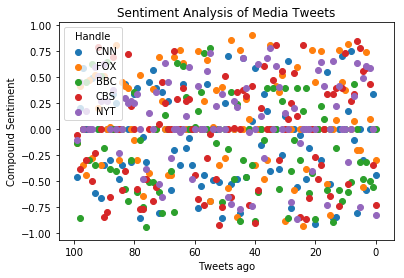

In [16]:
# create scatter plot of sentiment analysises of tweets
plt.scatter(cnn_tweet_df['Tweets Ago'], cnn_tweet_df['Tweet Compound'], label='CNN')
plt.scatter(fox_tweet_df['Tweets Ago'], fox_tweet_df['Tweet Compound'], label='FOX')
plt.scatter(bbc_tweet_df['Tweets Ago'], bbc_tweet_df['Tweet Compound'], label='BBC')
plt.scatter(cbs_tweet_df['Tweets Ago'], cbs_tweet_df['Tweet Compound'], label='CBS')
plt.scatter(nyt_tweet_df['Tweets Ago'], nyt_tweet_df['Tweet Compound'], label='NYT')
plt.gca().invert_xaxis()
plt.title('Sentiment Analysis of Media Tweets')
plt.xlabel('Tweets ago')
plt.ylabel('Compound Sentiment')
plt.legend(title='Handle', loc='best')
plt.show()

In [19]:
agg_cnn = cnn_tweet_df['Tweet Compound'].sum()
agg_fox = fox_tweet_df['Tweet Compound'].sum()
agg_bbc = bbc_tweet_df['Tweet Compound'].sum()
agg_cbs = cbs_tweet_df['Tweet Compound'].sum()
agg_nyt = nyt_tweet_df['Tweet Compound'].sum()

In [33]:
labels = ['CNN', 'FOX', 'BBC', 'CBS', 'NYT']

In [34]:
values = [agg_cnn, agg_fox, agg_bbc, agg_cbs, agg_nyt]

In [35]:
x_value = [1,2,3,4,5]

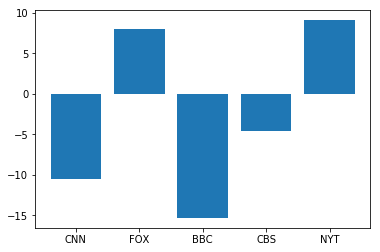

In [36]:
plt.bar(x_value, values)
plt.xticks(x_value, labels)
plt.show()